This notebook explores Fourier transforms Python.

Date Created: 27 Sep 2018
<br>
Last Modified: 15 Apr 2019
<br>
Humans Responsible: The Prickly Pythons

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 0.0 An analogy

In [3]:
f = np.exp(np.array([5,6,7,8]))

In [4]:
f

array([  148.4131591 ,   403.42879349,  1096.63315843,  2980.95798704])

In [5]:
np.log(f)

array([ 5.,  6.,  7.,  8.])

# 1.0 The DFT - Discrete Fourier Transform

$$
F[k] = \sum_{n=0}^{N-1} f[n] \exp\left(-\frac{2 \pi i nk}{N} \right)
$$

$$
f[n] = \frac{1}{N}\sum_{k=0}^{N-1} F[k] \exp\left(\frac{2 \pi i kn}{N} \right)
$$

$$ 
n,k = 0,1,..., N-1
$$

$$
i  = \sqrt{-1}
$$

In [6]:
f = np.array([5,6,7,8])
f

array([5, 6, 7, 8])

In [7]:
F = np.fft.fft(f)
F

array([ 26.+0.j,  -2.+2.j,  -2.+0.j,  -2.-2.j])

In [8]:
np.fft.ifft(F)

array([ 5.+0.j,  6.+0.j,  7.+0.j,  8.+0.j])

In [9]:
# Magnitude
np.abs(F)

array([ 26.        ,   2.82842712,   2.        ,   2.82842712])

In [10]:
np.sqrt(8)

2.8284271247461903

In [11]:
# Phase
np.angle(F)

array([ 0.        ,  2.35619449,  3.14159265, -2.35619449])

In [12]:
3*np.pi/4

2.356194490192345

## 1.1 A toy example

In [13]:
t = np.arange(0,3,0.01)

len(t)

300

In [14]:
wave_1 = 2*np.sin(2*np.pi*1 * t)       # 2sin(2pi t)
wave_2 = 3*np.sin(2*np.pi*2 * t + 0.3) # 3sin(4pi t +0.3)

f = wave_1 + wave_2

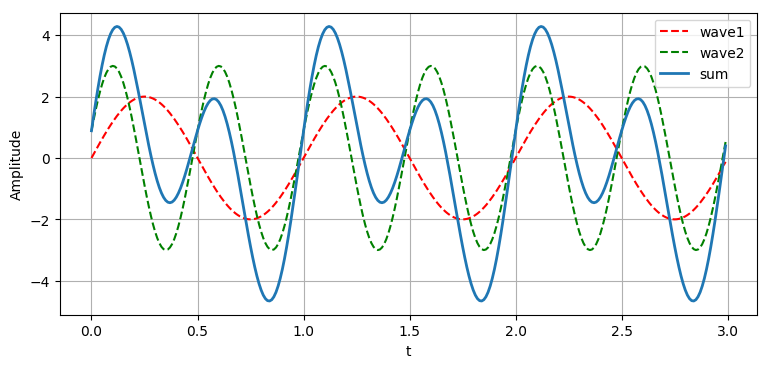

In [15]:
fig = plt.figure(figsize=(9,4))
plt.plot(t, wave_1, 'r--', label='wave1')
plt.plot(t, wave_2, 'g--', label='wave2')
plt.plot(t, f, linewidth=2, label='sum')

plt.xlabel('t')
plt.ylabel('Amplitude')
plt.legend(loc='best')
plt.grid()

plt.show()

In [16]:
F = np.fft.fft(f)

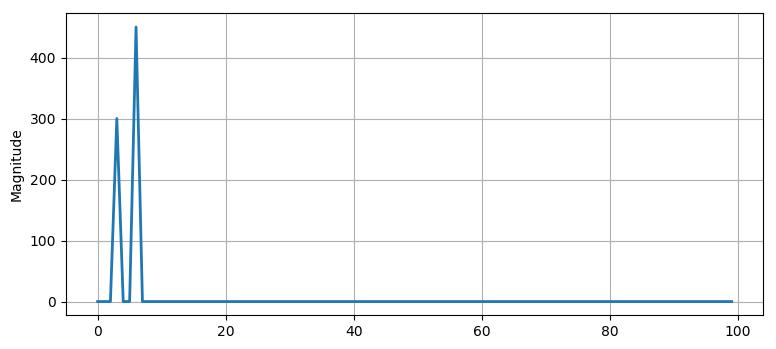

In [18]:
fig = plt.figure(figsize=(9,4))
plt.plot((np.abs(F)[0:100]), linewidth=2)

# plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid()

plt.show()

# 2.0 1D signal
[Electrocardiography](https://en.wikipedia.org/wiki/Electrocardiography) (ECG) data originally from:
<br>
ftp://ftp.ieee.org/uploads/press/rangayyan

In [19]:
f_ecg = np.genfromtxt("test_data/ecg3.txt")

# Put it on a nice scale
f_ecg = f_ecg - np.mean(f_ecg)
f_ecg = f_ecg/np.max(f_ecg)

# Number of samples
N_sample = len(f_ecg)

# Sampled at 200Hz
s = 200
t = (1/s) * np.arange(N_sample)
freq = s/N_sample * np.arange(N_sample)

# Simulate some additive 50Hz noise
f_ecg = f_ecg + 0.2*np.sin(2*np.pi*50 * t)

In [20]:
np.arange(N_sample)

array([   0,    1,    2, ..., 3997, 3998, 3999])

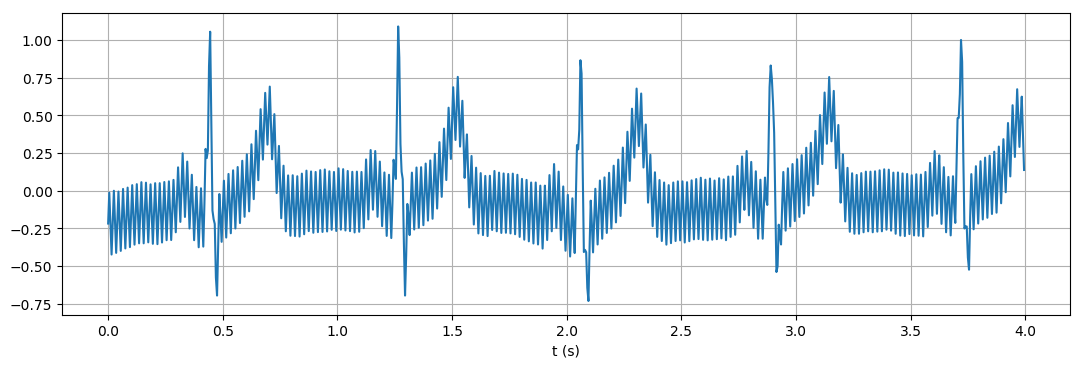

In [21]:
fig = plt.figure(figsize=(13,4))
plt.plot(t[0:800], f_ecg[0:800])
plt.xlabel('t (s)')
plt.grid()
plt.show()

In [22]:
F_ecg = np.fft.fft(f_ecg)

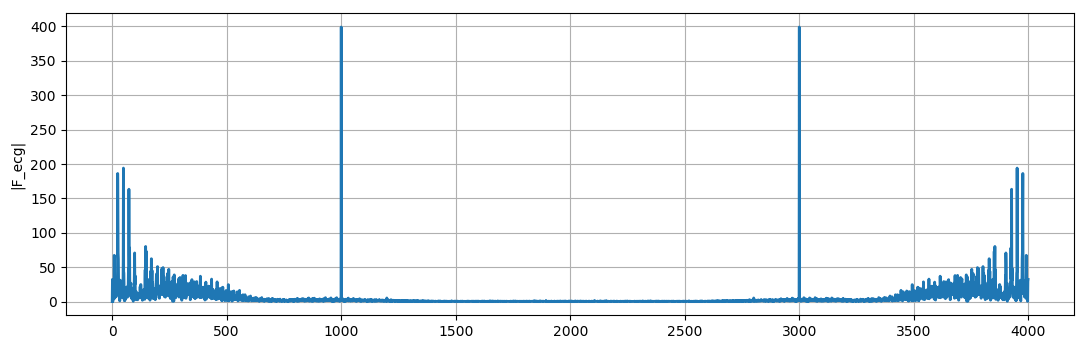

In [23]:
fig = plt.figure(figsize=(13,4))
plt.plot(np.abs(F_ecg), linewidth=2)

# plt.xlabel('frequency (Hz)')
plt.ylabel('|F_ecg|')
plt.grid()

plt.show()

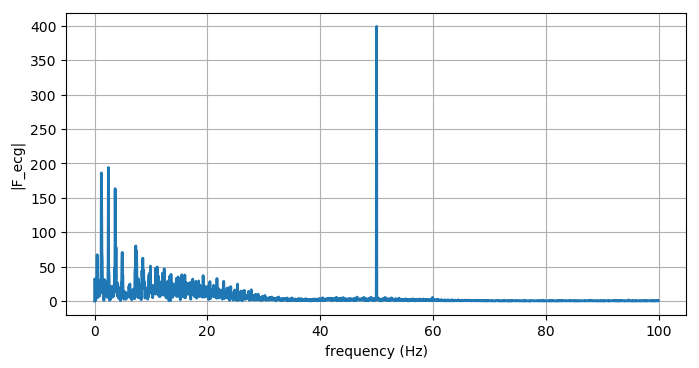

In [24]:
# Only need to keep half as the signal is real-valued.

fig = plt.figure(figsize=(8,4))
plt.plot(freq[0:int(N_sample/2)], np.abs(F_ecg[0:int(N_sample/2)]), linewidth=2)

plt.xlabel('frequency (Hz)')
plt.ylabel('|F_ecg|')
plt.grid()

plt.show()

In [25]:
# Make the filter 
filter_mag = np.ones(N_sample)
filter_mag[900:1100] = 0
filter_mag[2900:3100] = 0

In [26]:
# Do the filtering
F_ecg_filtered = F_ecg * filter_mag

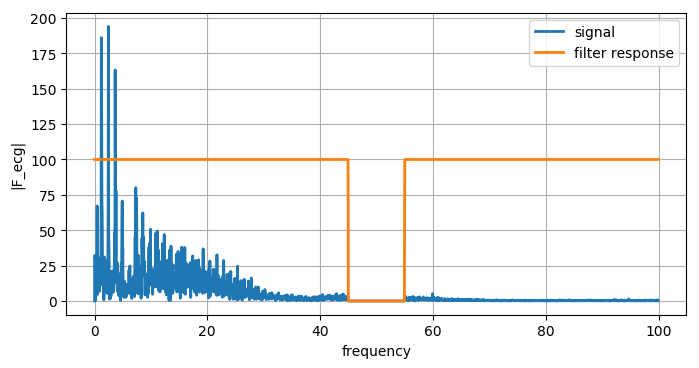

In [27]:
fig = plt.figure(figsize=(8,4))
plt.plot(freq[0:int(N_sample/2)], np.abs(F_ecg_filtered[0:int(N_sample/2)]), linewidth=2, label='signal')
plt.plot(freq[0:int(N_sample/2)], 100*filter_mag[0:int(N_sample/2)], linewidth=2, label='filter response')

plt.xlabel('frequency')
plt.ylabel('|F_ecg|')
plt.grid()
plt.legend()

plt.show()

In [28]:
f_ecg_filtered = np.fft.ifft(F_ecg_filtered)

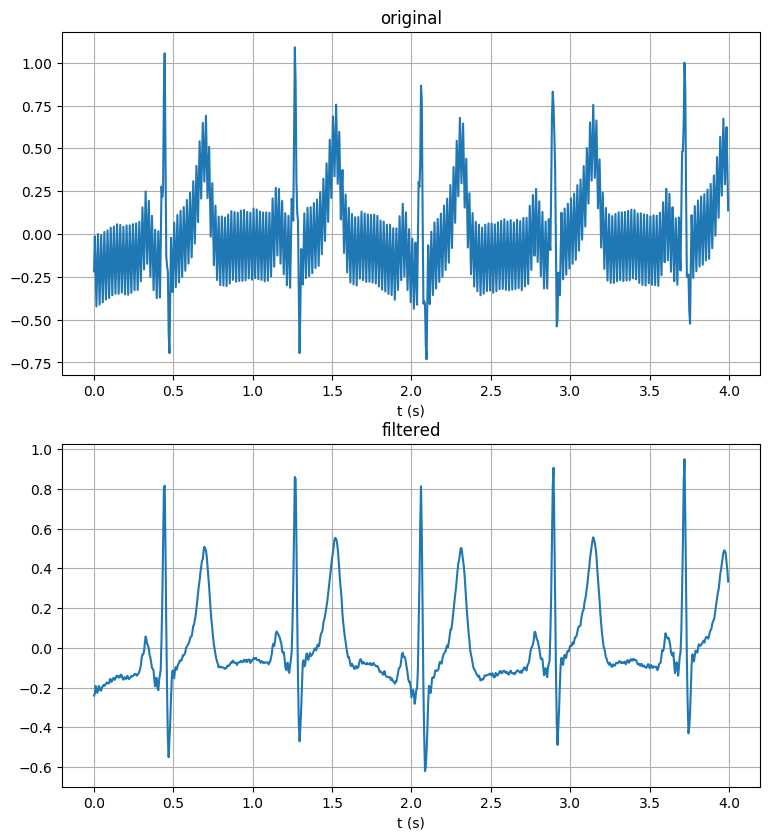

In [29]:
fig = plt.figure(figsize=(9,10))
ax = fig.add_subplot(211)
plt.plot(t[0:800], (f_ecg[0:800]))
plt.grid()
ax.set_xlabel("t (s)")
ax.set_title("original")
ax = fig.add_subplot(212)
plt.plot(t[0:800], np.real(f_ecg_filtered[0:800]))
plt.grid()
ax.set_xlabel("t (s)")
ax.set_title("filtered")


plt.show()


# 3.0 2D signal

In [30]:
from scipy.misc import imread

In [31]:
f = imread("test_data/HTsquirel.jpeg")

In [32]:
f = f + 0.0 # Convert to double
f = f / np.max(f)
f = f[:,:,0]

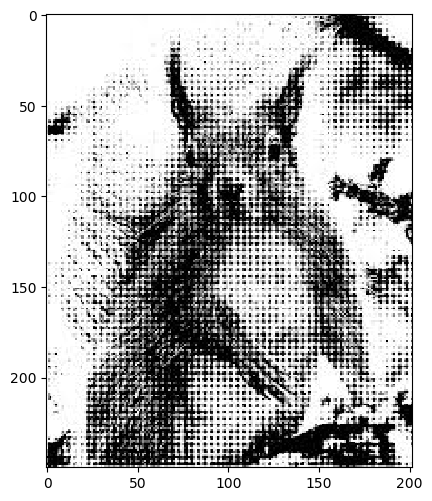

In [33]:
plt.figure(figsize=(6,6))
plt.imshow(f, cmap='gray')
plt.show()

In [34]:
F = np.fft.fftn(f)

In [35]:
F.shape

(250, 202)

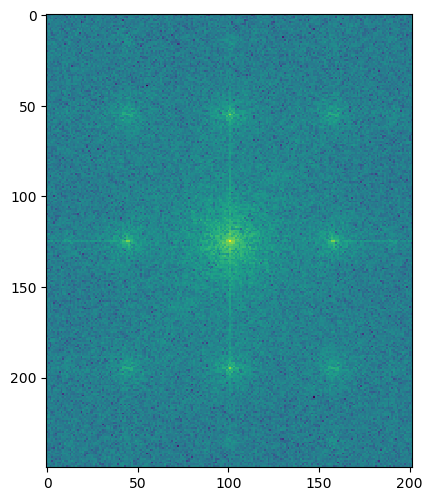

In [36]:
plt.figure(figsize=(6,6))
plt.imshow(np.fft.fftshift(np.log10(np.abs(F))))
plt.show()

In [37]:
# Make a filter

mask = np.ones_like(f)

d = 10
mask[196-d:196+d, 100-d:100+d]  = 0
mask[  56-d:56+d, 100-d:100+d]  = 0
mask[126-d:126+d,   44-d:44+d]  = 0
mask[126-d:126+d, 158-d:158+d]  = 0

mask[196-d:196+d, 44-d:44+d] = 0
mask[  56-d:56+d, 44-d:44+d] = 0
mask[  56-d:56+d, 158-d:158+d] = 0
mask[196-d:196+d, 158-d:158+d] = 0
# mask[  126-3*d:126+3*d, 100-3*d:100+3*d] = 0

# Mask the FT
F_masked = np.fft.fftshift(F) * mask

//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log10


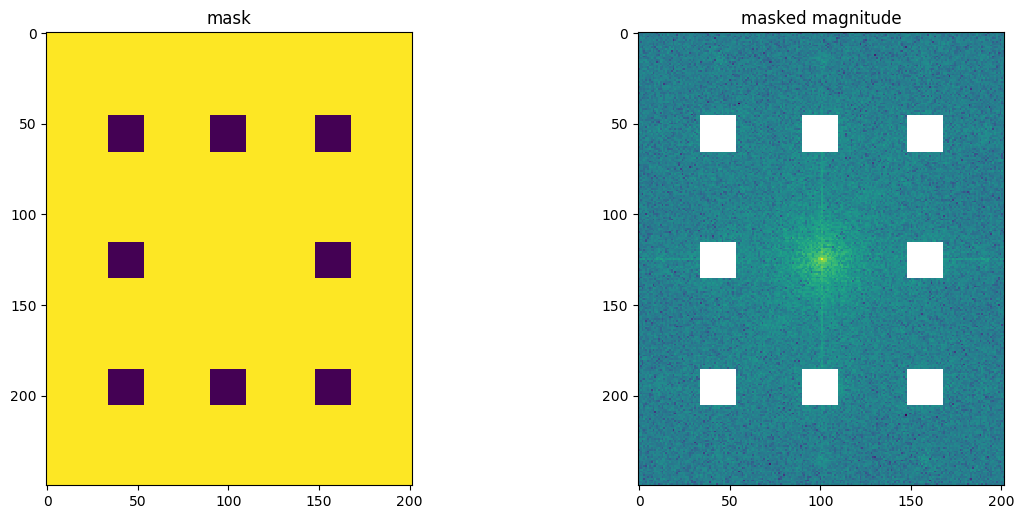

In [38]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)
im = ax.imshow(mask, interpolation='nearest')
ax.set_title("mask")
ax = fig.add_subplot(122)
im = ax.imshow(np.log10(np.abs(F_masked)), interpolation='nearest')
ax.set_title('masked magnitude')

plt.show()

In [39]:
F_masked = np.fft.ifftshift(F_masked)

In [42]:
f_masked = np.fft.ifftn(F_masked)

f_masked[f_masked > 1] = 1

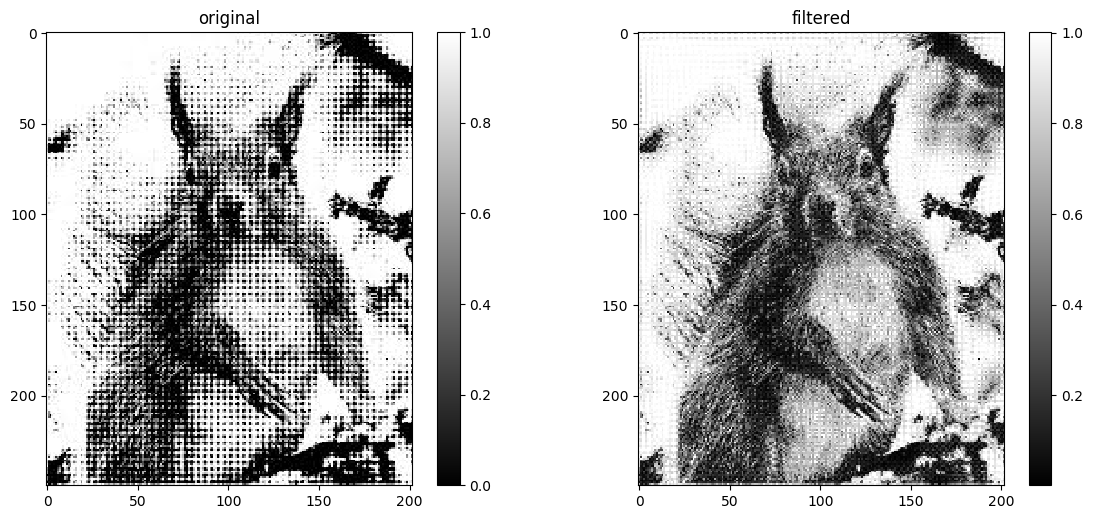

In [43]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)
im = ax.imshow(f, interpolation='nearest', cmap='gray')
ax.set_title("original")
fig.colorbar(im)
ax = fig.add_subplot(122)
im = ax.imshow(np.abs(f_masked), interpolation='nearest', cmap='gray')
ax.set_title("filtered")
fig.colorbar(im)

plt.show()

# 3.1 Multi-contrast Imaging

See Liu et al. Journal of Biomedical Optics 19(10), 106002 (October 2014)

In [44]:
from skimage import data, color

In [45]:
img = data.immunohistochemistry()
img = color.rgb2gray(img)
img = img.astype(np.float64)

In [46]:
f = img.copy()
F = np.fft.fftn(f)

Nx, Ny = f.shape
Nx_h = int(np.round(Nx/2))
Ny_h = int(np.round(Ny/2))

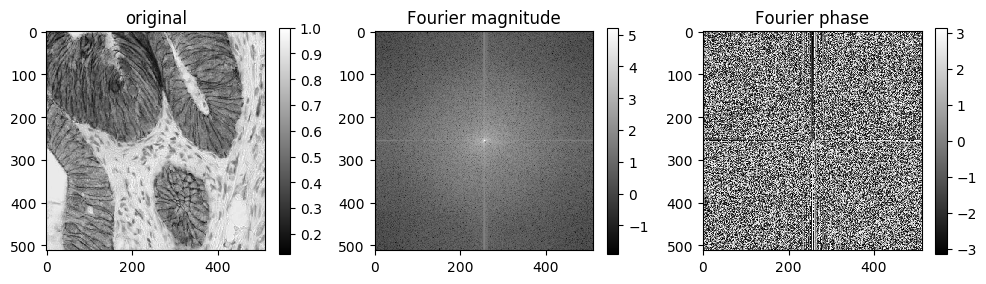

In [49]:
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(131)
im = ax.imshow(f, interpolation='nearest', cmap='gray')
ax.set_title("original")
fig.colorbar(im)
ax = fig.add_subplot(132)
im = ax.imshow(np.fft.fftshift(np.log10(np.abs(F))), interpolation='nearest', cmap='gray')
ax.set_title("Fourier magnitude")
fig.colorbar(im)
ax = fig.add_subplot(133)
im = ax.imshow(np.fft.fftshift(np.angle(F)), interpolation='nearest', cmap='gray')
ax.set_title("Fourier phase")
fig.colorbar(im)

plt.show()

## Make the masks

In [50]:
# Radius of the circular mask in number of pixels
r = 100

mask_circ1 = np.zeros((Nx,Ny))
r_sq = r**2

for x in range(Nx):
    for y in range(Ny):
        if ((x-Nx_h)**2 + (y-Ny_h)**2) < r_sq:
            mask_circ1[x,y] = 1

In [51]:
# Radius of the circular mask in number of pixels
r = 10

mask_circ2 = np.zeros((Nx,Ny))
r_sq = r**2

for x in range(Nx):
    for y in range(Ny):
        if ((x-Nx_h)**2 + (y-Ny_h)**2) < r_sq:
            mask_circ2[x,y] = 1

In [52]:
mask_BF = mask_circ1.copy()

mask_DF = 1 - mask_circ2.copy()

mask_LPC = mask_circ1.copy()
mask_LPC[:,Ny_h:] = 0

mask_RPC = mask_circ1.copy()
mask_RPC[:,0:Ny_h] = 0

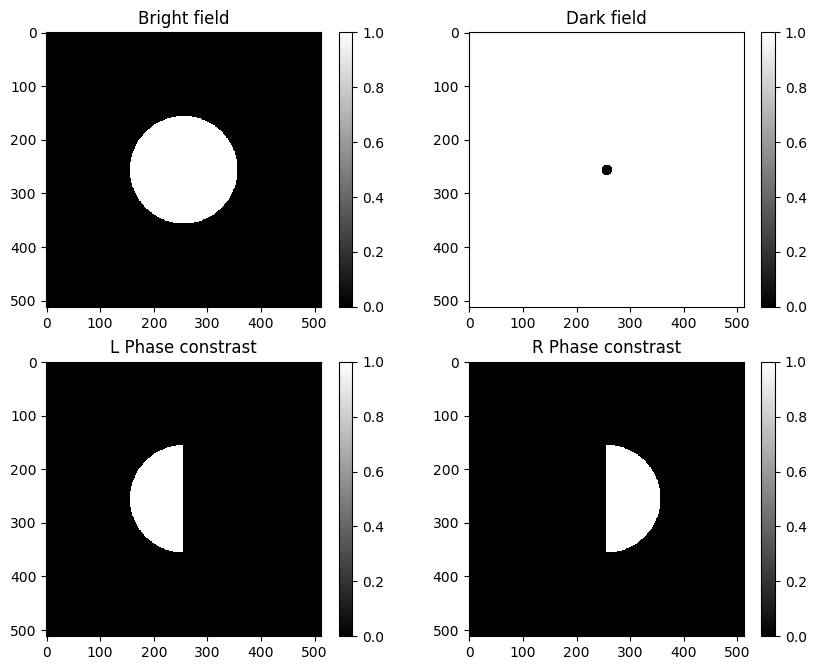

In [53]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(221)
im = ax.imshow(mask_BF, interpolation='nearest', cmap='gray')
ax.set_title("Bright field")
fig.colorbar(im)
ax = fig.add_subplot(222)
im = ax.imshow(mask_DF, interpolation='nearest', cmap='gray')
ax.set_title("Dark field")
fig.colorbar(im)
ax = fig.add_subplot(223)
im = ax.imshow(mask_LPC, interpolation='nearest', cmap='gray')
ax.set_title("L Phase constrast")
fig.colorbar(im)
ax = fig.add_subplot(224)
im = ax.imshow(mask_RPC, interpolation='nearest', cmap='gray')
ax.set_title("R Phase constrast")
fig.colorbar(im)

plt.show()

## Apply the masks to the image in Fourier space

In [54]:
f_BF = np.fft.ifftn(F * np.fft.ifftshift(mask_BF))

f_DF = np.fft.ifftn(F * np.fft.ifftshift(mask_DF))

f_LPC = np.fft.ifftn(F * np.fft.ifftshift(mask_LPC))

f_RPC = np.fft.ifftn(F * np.fft.ifftshift(mask_RPC))

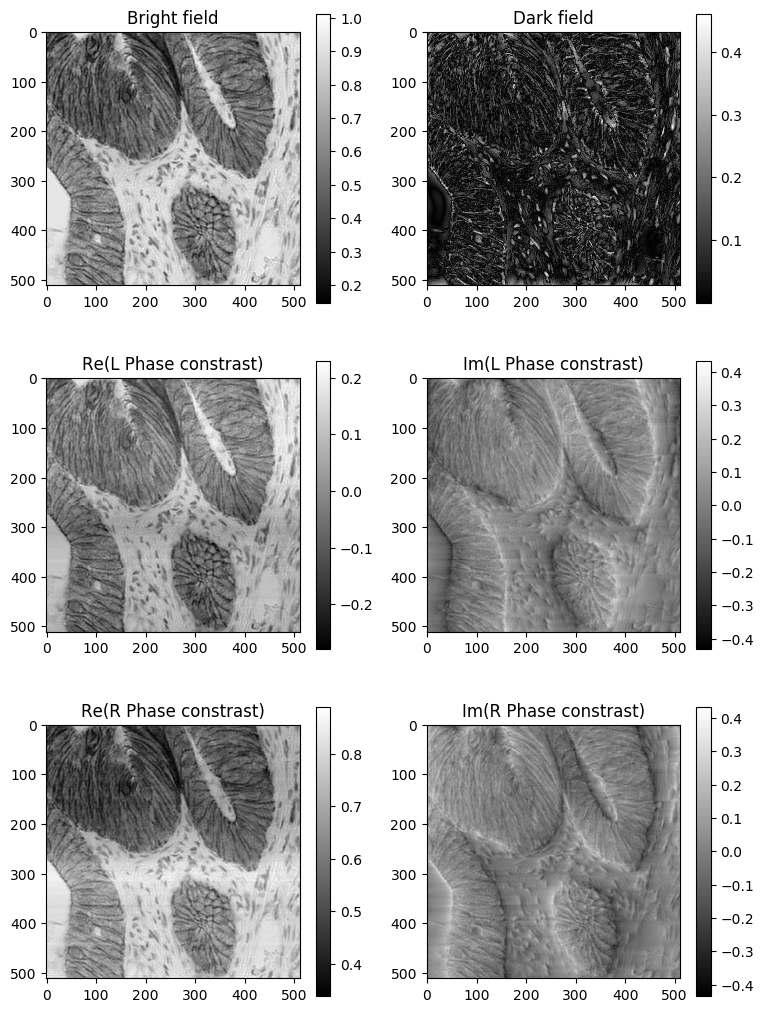

In [55]:
fig = plt.figure(figsize=(9,13))
ax = fig.add_subplot(321)
im = ax.imshow(np.abs(f_BF), interpolation='nearest', cmap='gray')
ax.set_title("Bright field")
fig.colorbar(im)
ax = fig.add_subplot(322)
im = ax.imshow((np.abs(f_DF)), interpolation='nearest', cmap='gray')
ax.set_title("Dark field")
fig.colorbar(im)
ax = fig.add_subplot(323)
im = ax.imshow(np.real(f_LPC), interpolation='nearest', cmap='gray')
ax.set_title("Re(L Phase constrast)")
fig.colorbar(im)
ax = fig.add_subplot(324)
im = ax.imshow(np.imag(f_LPC), interpolation='nearest', cmap='gray')
ax.set_title("Im(L Phase constrast)")
fig.colorbar(im)
ax = fig.add_subplot(325)
im = ax.imshow(np.real(f_RPC), interpolation='nearest', cmap='gray')
ax.set_title("Re(R Phase constrast)")
fig.colorbar(im)
ax = fig.add_subplot(326)
im = ax.imshow(np.imag(f_RPC), interpolation='nearest', cmap='gray')
ax.set_title("Im(R Phase constrast)")
fig.colorbar(im)

plt.show()